**Step 1 : Importing Libraries**

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2: Load Dataset**

In [18]:
df = pd.read_csv("train.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


**Step 3: Data Preprocessing**

In [19]:
df['Gender'] = df['Gender'].map({'Male' : 1, 'Female' : 0})
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes' : 1, 'No' : 0})
df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year' : 1, '> 2 Years' : 2})

x = df.drop(['id','Response'], axis = 1)
y = df['Response']

**Step 4 : Split Data**

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

**Step 5 : Train the Model**

In [21]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

**Step 6: Model Evaluation**

In [22]:
y_pred = model.predict(x_test)

In [23]:
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Recall :" , recall_score(y_test,y_pred))
print("Classification Report : ")
print(classification_report(y_test, y_pred))

Accuracy :  0.8651963999895044
Recall : 0.11866008610731912
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     66699
           1       0.38      0.12      0.18      9523

    accuracy                           0.87     76222
   macro avg       0.63      0.55      0.55     76222
weighted avg       0.82      0.87      0.83     76222



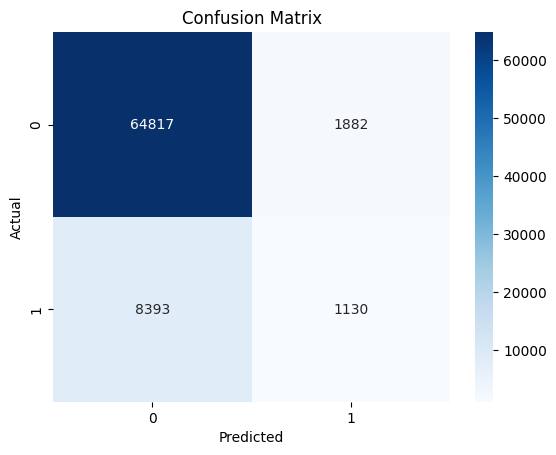

In [24]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Trying Another models

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
lr = LogisticRegression(max_iter = 1000)
lr.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [27]:
y_pred1 = lr.predict(x_test)

In [28]:
print("Accuracy : ", accuracy_score(y_test,y_pred1))
print("Recall :" , recall_score(y_test,y_pred1))
print("Classification Report : \n",classification_report(y_test, y_pred1))

Accuracy :  0.8744850568077458
Recall : 0.002940249921243306
Classification Report : 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.28      0.00      0.01      9523

    accuracy                           0.87     76222
   macro avg       0.58      0.50      0.47     76222
weighted avg       0.80      0.87      0.82     76222



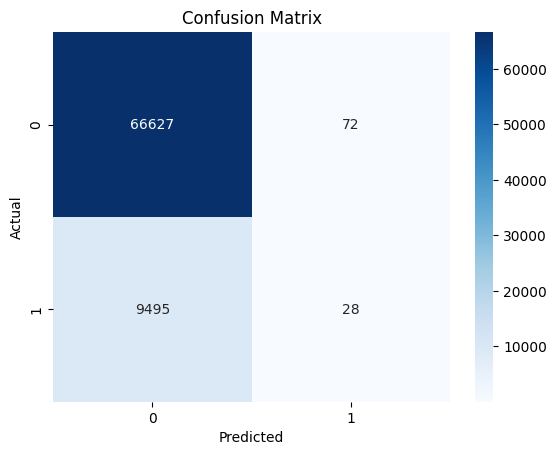

In [29]:
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()